# Simple Linear Regression 

In [6]:
import pandas as pd

In [7]:
advertising = pd.read_csv(r"C:\Users\hp\Downloads\tvmarketing.csv")

In [8]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [9]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [10]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [11]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [12]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


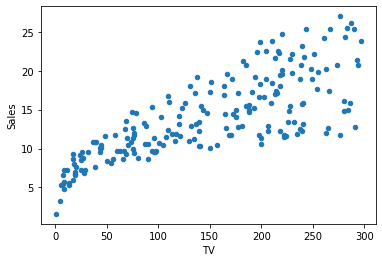

In [13]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

#Perfroming Simple Linear Regression

Equation of linear regression
𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 
𝑦  is the response
𝑐  is the intercept
𝑚1  is the coefficient for the first feature
𝑚𝑛  is the coefficient for the nth feature
In our case:

𝑦=𝑐+𝑚1×𝑇𝑉 
The  𝑚  values are called the model coefficients or model parameters.

#Generic Steps in Model Building using sklearn

#Preparing X and y
The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
However, X can be a dataframe as Pandas is built over NumPy.

In [16]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [17]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

#Splitting Data into Training and Testing Sets

In [37]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [38]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [39]:
train_test_split      

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [41]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


#Performing Linear Regression

In [43]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Coefficients Calculation

In [44]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

7.310810165411683
[0.04581434]


#add Codeadd Markdown
𝑦=6.989+0.0464×𝑇𝑉 

Now, let's use this equation to predict our sales.

In [45]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [46]:
type(y_pred)

numpy.ndarray

In [47]:
#Computing RMSE and R^2 Values
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. 
This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

SyntaxError: invalid syntax (<ipython-input-47-d79e673760cf>, line 2)

In [48]:
y_test.shape # cheek the shape to generate the index for plot

(60,)

Text(0, 0.5, 'Sales')

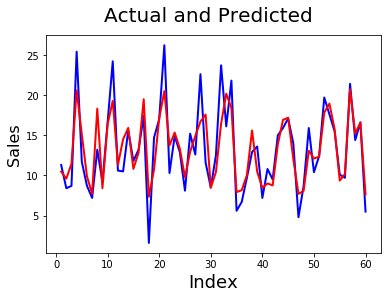

In [49]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)        

Text(0, 0.5, 'ytest-ypred')

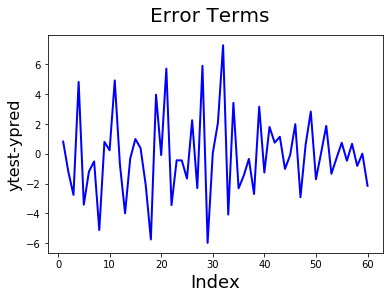

In [50]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [52]:
r_squared = r2_score(y_test, y_pred)

In [53]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


In [54]:
# this mse =7.9 means that this model is not able to match the 7.9 percent of the values
# r2 means that your model is 72% is accurate on test data .

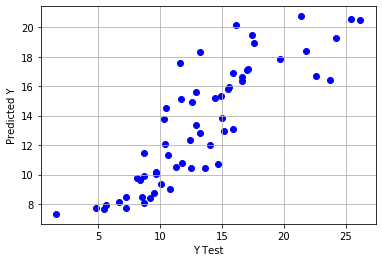

In [55]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()